## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [31]:
import os
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten
from keras.regularizers import l1_l2
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [32]:
train, test = keras.datasets.cifar10.load_data()

In [33]:
## 資料前處理
def preproc_x(x, flatten=False):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [34]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
train_x = preproc_x(x_train)
test_x = preproc_x(x_test)

# Preprc the outputs
train_y = preproc_y(y_train)
test_y = preproc_y(y_test)

In [35]:
#Using Dropout and BatchNormalization to do the regularization
def build_model(input_shape, output_units = 10):
    input_layer = keras.layers.Input(input_shape)

    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same') (input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same') (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same') (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same') (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)

    x = Dense(units = 512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(units = 256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(units = 128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    output_layer = Dense(units = output_units, activation = 'softmax')(x)

    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])

    return model

In [36]:
batch_size = 128
epochs = 50

In [38]:
results = {}

model = build_model(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Dropout_BN"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
__________

50000/50000 [==============================] - 41s 826us/step - loss: 0.2115 - acc: 0.9254 - val_loss: 0.6175 - val_acc: 0.8178
Epoch 28/50
50000/50000 [==============================] - 41s 827us/step - loss: 0.1986 - acc: 0.9306 - val_loss: 0.6484 - val_acc: 0.8145
Epoch 29/50
50000/50000 [==============================] - 41s 828us/step - loss: 0.1907 - acc: 0.9336 - val_loss: 0.6977 - val_acc: 0.8051
Epoch 30/50
50000/50000 [==============================] - 43s 855us/step - loss: 0.1899 - acc: 0.9335 - val_loss: 0.6988 - val_acc: 0.8092
Epoch 31/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1817 - acc: 0.9349 - val_loss: 0.7052 - val_acc: 0.7977
Epoch 32/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.1773 - acc: 0.9383 - val_loss: 0.6919 - val_acc: 0.8128
Epoch 33/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.1698 - acc: 0.9409 - val_loss: 0.6542 - val_acc: 0.8176
Epoch 34/50
50000/50000 [=============

In [39]:
#Using l1_l2 regularizer and BatchNormalization
def build_model2(input_shape, output_units):
    input_layer = keras.layers.Input(input_shape)
    regularizer = l1_l2(l1 = 1e-4 , l2 = 1e-6)


    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)

    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)

    x = Flatten()(x)

    x = Dense(units = 512, kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(units = 256, kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(units = 128, kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    output_layer = Dense(units = output_units, activation = 'softmax')(x)

    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [40]:
model = build_model2(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Regularizer_BN"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
__________

50000/50000 [==============================] - 41s 811us/step - loss: 0.7975 - acc: 0.9346 - val_loss: 1.4979 - val_acc: 0.7734
Epoch 33/50
50000/50000 [==============================] - 41s 812us/step - loss: 0.7851 - acc: 0.9377 - val_loss: 1.6554 - val_acc: 0.7333
Epoch 34/50
50000/50000 [==============================] - 41s 813us/step - loss: 0.7746 - acc: 0.9396 - val_loss: 1.7865 - val_acc: 0.7368
Epoch 35/50
50000/50000 [==============================] - 41s 813us/step - loss: 0.7728 - acc: 0.9405 - val_loss: 1.6755 - val_acc: 0.7419
Epoch 36/50
50000/50000 [==============================] - 40s 808us/step - loss: 0.7770 - acc: 0.9398 - val_loss: 1.7153 - val_acc: 0.7349
Epoch 37/50
50000/50000 [==============================] - 40s 805us/step - loss: 0.7701 - acc: 0.9424 - val_loss: 1.6454 - val_acc: 0.7517
Epoch 38/50
50000/50000 [==============================] - 40s 810us/step - loss: 0.7611 - acc: 0.9429 - val_loss: 1.5725 - val_acc: 0.7635
Epoch 39/50
50000/50000 [=======

In [41]:
#Using l1_l2 regularizer and Dropout
def build_model3(input_shape, output_units):

    input_layer = keras.layers.Input(input_shape)
    regularizer = l1_l2(l1 = 1e-4 , l2 = 1e-6)

    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(input_layer)
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(units = 512, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dropout(0.25)(x)
    x = Dense(units = 256, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dropout(0.25)(x)  
    x = Dense(units = 128, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dropout(0.25)(x)  

    output_layer = Dense(units = output_units, activation = 'softmax')(x)

    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [42]:
model = build_model3(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Regularizer_Dropout"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        9248      
__________

50000/50000 [==============================] - 31s 629us/step - loss: 1.1634 - acc: 0.7373 - val_loss: 1.0809 - val_acc: 0.7663
Epoch 41/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.1595 - acc: 0.7385 - val_loss: 1.0817 - val_acc: 0.7665
Epoch 42/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.1529 - acc: 0.7400 - val_loss: 1.0841 - val_acc: 0.7624
Epoch 43/50
50000/50000 [==============================] - 31s 612us/step - loss: 1.1585 - acc: 0.7391 - val_loss: 1.0847 - val_acc: 0.7645
Epoch 44/50
50000/50000 [==============================] - 31s 625us/step - loss: 1.1563 - acc: 0.7397 - val_loss: 1.0774 - val_acc: 0.7675
Epoch 45/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.1554 - acc: 0.7421 - val_loss: 1.0907 - val_acc: 0.7636
Epoch 46/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.1456 - acc: 0.7434 - val_loss: 1.0955 - val_acc: 0.7607
Epoch 47/50
50000/50000 [=======

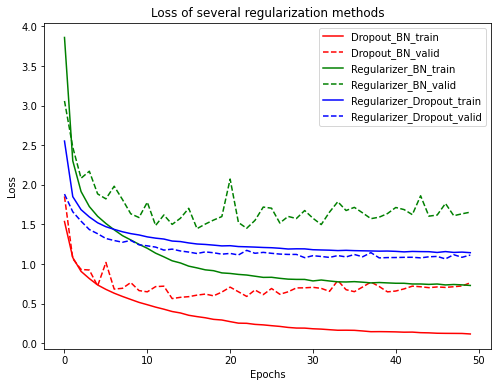

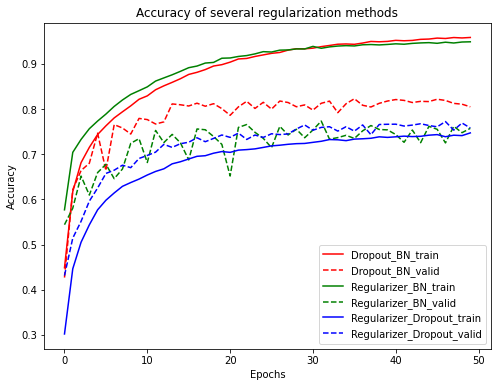

In [43]:
import matplotlib.pyplot as plt

colors = ['r','g','b']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_loss'], '-',label = cond + "_train", color = colors[i])
    plt.plot(results[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of several regularization methods')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_acc'],'-', label = cond + "_train", color = colors[i])
    plt.plot(results[cond]['valid_acc'],'--', label = cond + "_valid", color = colors[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of several regularization methods')
plt.legend()
plt.show()